In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv im

In [2]:
n = np.ones(4)*5
y = np.array([0,1,3,5])
dose = np.array([-0.86, -0.3, -0.05, 0.73])

x = np.linspace(-100,100,1000)
with pm.Model() as model:
    
    # Prior
    alpha = pm.Normal('alpha', mu=0, sd=100)
    beta = pm.Normal('beta', mu=0, sd=100)
    
    # Linear combinations of parameters
    theta = pm.invlogit(alpha + beta*dose)
    
    # Model likelihood
    deaths = pm.Binomial('deaths', n=n, p=theta, observed=y)

In [3]:
with model:
    trace = pm.sample(2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


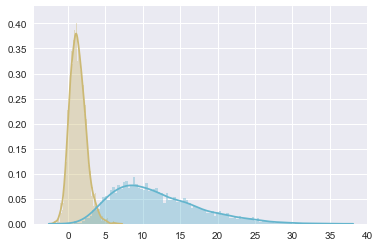

In [4]:
sns.set()
current_palette = sns.color_palette()
sns.distplot(trace['alpha'], bins=100, color=current_palette[4])
sns.distplot(trace['beta'], bins=100, color=current_palette[5])
plt.show()

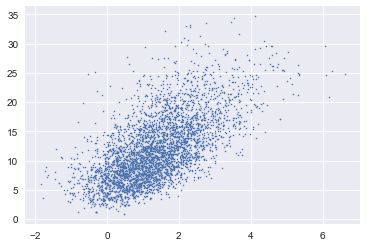

In [5]:
plt.scatter(trace['alpha'], trace['beta'], marker='x', s=0.2)
plt.show()

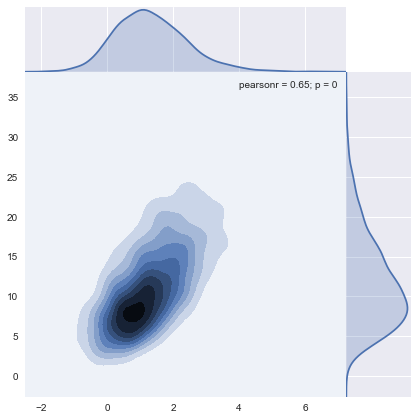

In [6]:
g = sns.jointplot(trace['alpha'], trace['beta'], space=0, kind='kde')
plt.show()

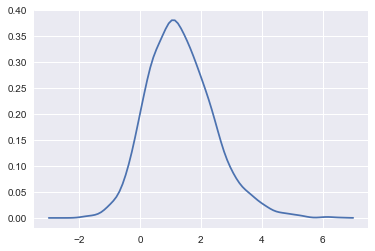

In [8]:
from scipy import stats
x = np.linspace(-3,7, 100)
kde = stats.gaussian_kde(trace['alpha'])
plt.plot(x,kde.pdf(x))
plt.show()

In [12]:
from sklearn.neighbors.kde import KernelDensity
kdeModel = KernelDensity(kernel='gaussian').fit(trace['alpha'].reshape(1,4000))
plt.hist(kdeModel.sample(1000), bins=100)
plt.show()